## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# So we can see everything
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
# Import all three of the csvs
users = pd.read_csv('users.csv.gz')
video_plays = pd.read_csv('video_plays.csv.gz')

In [3]:
# The sessions csv would not load with read_csv due to a single quotation mark in a string, so after a quick google,
# I found that quoting = csv.QUOTE_NONE fixed it, which removes the quoting of fields
import csv
sessions = pd.read_csv('sessions.csv.gz',quoting=csv.QUOTE_NONE)

# EDA - Exploring the three datasets

## User Dataset

In [4]:
users.head()

,user_id,user_first_seen
0,PYwgLgxCdMRNEBZAQ5u58+R3HilFiQnMGx7V+SG6Q+A=,2018-09-08T23:28:29.000Z
1,kWoS1zVL5VpyCwK4bM6bkHphmh/SZRQazOeMsExwrdg=,2017-04-04T12:55:46.000Z
2,LwCPyTc+nOYAQmEB/uxWNuYLI6pQHdPaiz/Jfx6cyRc=,2019-05-06T04:33:38.000Z
3,ro0QVlABPc//+XjnrA2tsaNfIFSjpQH/DLZioaOfvaU=,2017-10-08T17:16:25.000Z
4,zoX8k80gYtnwcE3ws8PUIgjg7ZGgdBYeWVdi6LU2cdo=,2018-07-28T18:25:39.000Z


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          21419 non-null  object
 1   user_first_seen  21404 non-null  object
dtypes: object(2)
memory usage: 334.8+ KB


In [6]:
# Change user_first_seen to a datetime object
users.user_first_seen = pd.to_datetime(users.user_first_seen)

In [7]:
# Confirm the change occurred
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   user_id          21419 non-null  object             
 1   user_first_seen  21404 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 334.8+ KB


In [8]:
# Confirm that all of the user IDs are unique - as they should be 
len(users.user_id.unique())

21419

In [9]:
# What is the earliest timestamp of our data?
users.user_first_seen.sort_values(ignore_index=True)[0]

Timestamp('2016-07-06 20:16:40+0000', tz='UTC')

In [10]:
# How about the latest?
users.user_first_seen.sort_values(ascending=False, ignore_index=True)[0]

Timestamp('2019-10-31 23:56:45+0000', tz='UTC')

In [11]:
# How many users have never used the Stream App? And what proportion is that of our population?
print(f'The number of users who have never logged in is {users.user_first_seen.isnull().sum()}')
print(f'The proportion of users who have never logged in is {round((users.user_first_seen.isnull().sum()/len(users))*100,2)}%')

The number of users who have never logged in is 15
The proportion of users who have never logged in is 0.07%


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


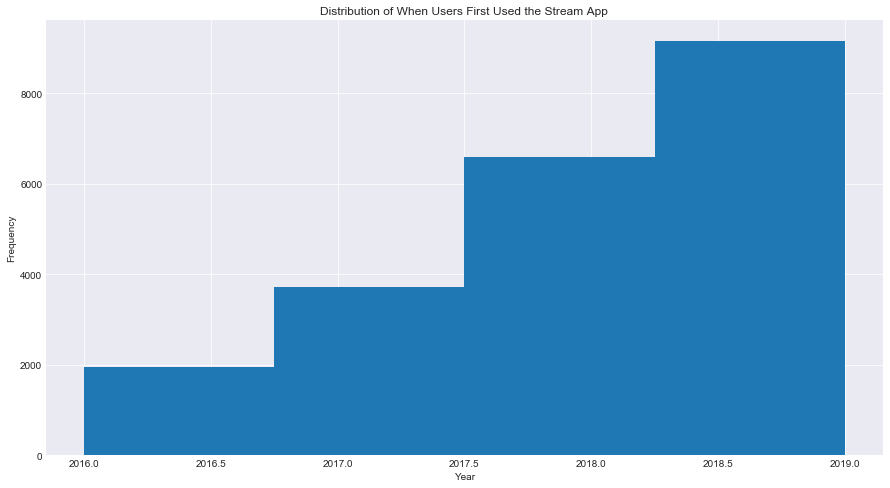

In [12]:
# Looking at how recently these users started using the app
users['year'] = users.user_first_seen.dt.year

_, ax = plt.subplots(figsize=(15,8))
ax.hist(users.year, bins=4)
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of When Users First Used the Stream App')
plt.show()

##### As we can see from the histogram above, most users first used the Stream App in 2019, but the oldest users used the app for the first time in 2016.

## Sessions Dataset

In [13]:
sessions.head()

,session_id,user_id,start_timestamp,end_timestamp,device_id,device_model,pages_viewed
0,+/q3qGuETIY1LaZQX3CNlpfnqe0e52Q0izE4hWw7ZbQ=,EBiN6MaE9cMe2RzHeUEMl0Cao43fV+ZLdDNOaPbq7jY=,2019-10-22T02:28:36.000Z,2019-10-22T02:45:42.000Z,8rVYy/i0IO6X6eCVMO1bBYL6GStNQAu1t30bDRRmqBA=,iPhone X,3
1,+0oiAQIOprzT6y+4MY/Byl0VrqRcm8y84LaVojzkK1o=,JkgP/Vv1O5OW2CA6ZxH8Lj+ZfFJ3DPTyGfnGsBqAPIw=,2019-10-10T21:39:45.000Z,2019-10-10T22:36:06.000Z,iXoereVMHrvS9aeuKO1vPl3ID/kDgm7eozWLuNDH4Os=,iPad mini 3,5
2,+2wSs5oATWWFEafTae7n6Wfs2PD5eVvMu00fnBqvqpI=,mWkZ25Zf5OurflAcJBkW73Hp+/DkByBASxcogE+sCw4=,2019-10-04T12:14:24.000Z,2019-10-04T12:14:24.000Z,YhRmMhfVOv+KmkvIhARQQLPWzG8nwef3nsoNpMTmsZs=,iPhone XR,1
3,+5SKoICqHRNL5tOgW8zOfISnydz3kN3go7rOiGFIvxQ=,GMDASCr491TinBxtv6Cn9xwRlkniJ1gR4mkO36+oca4=,2019-10-19T02:58:03.000Z,2019-10-19T03:53:33.000Z,Ddvv6gZM3OYoaNHE/rZ52PTY1vVP6FDqgWd4bDsG49w=,iPad Air (3rd generation),2
4,+6teO9lScVoGPsikLRWaXLSVPS/ieucOesAaSckNA+o=,65GGmW+FPzuOewTGMh7laHIU12QdAgntdmM/4eK5/us=,2019-10-28T02:41:15.000Z,2019-10-28T03:30:08.000Z,tuLLTYaZWr7eb4q9cAVLCPJzKjnmTGhW8sW9PyzRGic=,iPhone XR,5


In [14]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260426 entries, 0 to 260425
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   session_id       260426 non-null  object
 1   user_id          260426 non-null  object
 2   start_timestamp  260426 non-null  object
 3   end_timestamp    260426 non-null  object
 4   device_id        260426 non-null  object
 5   device_model     260426 non-null  object
 6   pages_viewed     260426 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 13.9+ MB


In [15]:
# Change the timestamp columns to datetime objects
sessions.start_timestamp = pd.to_datetime(sessions.start_timestamp)
sessions.end_timestamp = pd.to_datetime(sessions.end_timestamp)

In [16]:
# Confirm the timestamp columns are datetime objects
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260426 entries, 0 to 260425
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   session_id       260426 non-null  object             
 1   user_id          260426 non-null  object             
 2   start_timestamp  260426 non-null  datetime64[ns, UTC]
 3   end_timestamp    260426 non-null  datetime64[ns, UTC]
 4   device_id        260426 non-null  object             
 5   device_model     260426 non-null  object             
 6   pages_viewed     260426 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(1), object(4)
memory usage: 13.9+ MB


In [17]:
# What is the earliest start date of a session?
sessions.start_timestamp.sort_values(ignore_index=True)[0]

Timestamp('2019-10-01 00:00:00+0000', tz='UTC')

In [18]:
# What is the latest start date of a session?
sessions.start_timestamp.sort_values(ascending=False,ignore_index=True)[0]

Timestamp('2019-10-31 23:59:59+0000', tz='UTC')

In [19]:
# Add a column for sessions length
sessions['session_length'] = sessions['end_timestamp'] - sessions['start_timestamp']

In [20]:
# What was the longest and shortest sessions?
print(f'The shortest session was {sessions.session_length.sort_values(ignore_index=True)[0]}')
print(f'The longest session was {sessions.session_length.sort_values(ascending=False,ignore_index=True)[0]}')

The shortest session was 0 days 00:00:00
The longest session was 28 days 17:50:00


In [21]:
# What is the min, mean, and max number of pages viewed by users during a session?
sessions.pages_viewed.describe()

count    260426.000000
mean          4.147608
std           4.903530
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         237.000000
Name: pages_viewed, dtype: float64

#### Investigating the number of pages viewed

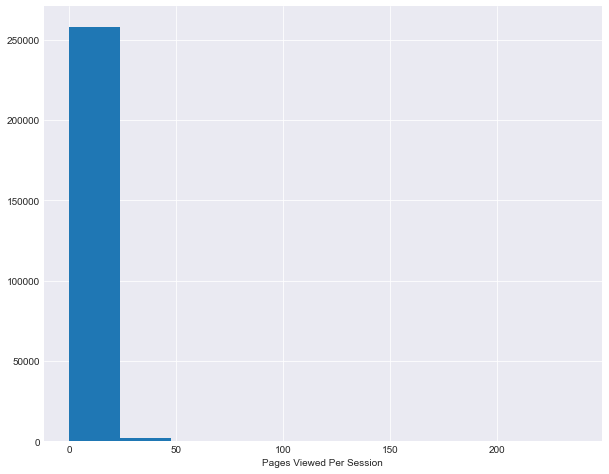

In [22]:
# Let's take a closer look at the pages viewed using a histogram
_, ax = plt.subplots(figsize=(10,8))
ax.hist(sessions.pages_viewed, bins=10)
ax.set_xlabel('Pages Viewed Per Session')
plt.show()

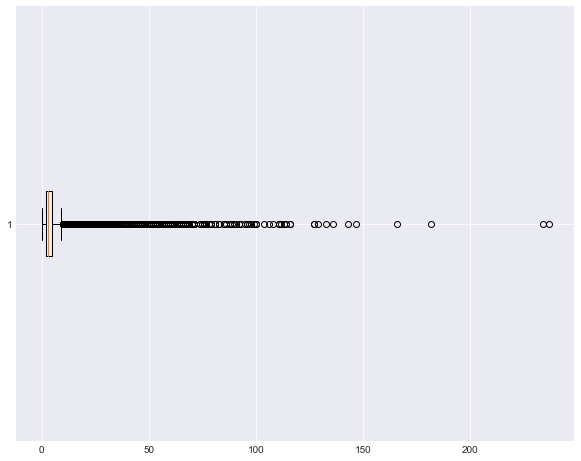

In [23]:
# Let's look at a box plot too
_, ax = plt.subplots(figsize=(10,8))
ax.boxplot(sessions.pages_viewed, vert=False)
plt.show()

It looks like in the bulk of sessions, users view < 5 pages in a session, but there are a good amount of outliers.

In [24]:
# There are 56,495 sessions where a user viewed more than 5 pages
sessions[sessions.pages_viewed > 5]

,session_id,user_id,start_timestamp,end_timestamp,device_id,device_model,pages_viewed,session_length
16,+th+bNjYnzUxaXqtzMnSVpgWupcsHoZxJeyxqFL9Lh8=,3Dr0CvBht7664Z1QwpqyzfbePVAGh2HvKfJg7dzH2BI=,2019-10-29 18:20:32+00:00,2019-10-29 19:22:09+00:00,ytQXw+AJWv2AGfW8LBMW48Zbynf+VTvU+V7KrOLeTKI=,U504TL,9,01:01:37
18,+yxSrNUGfmTaD3ellgKiyFAPo5cG/vTiOXyPZ0rtSiA=,yGp+pFgjj89CVf9ek5P7AwbGgEL3dGcHASdlADmtkfk=,2019-10-01 03:07:33+00:00,2019-10-01 03:28:42+00:00,I5ZMSPqrK9FYLFHOXBHvl3+55CWDS+0EUQFfkDoangQ=,iPhone X,6,00:21:09
19,+zZFmAuNTfGeuXwdYq5zU7dYcNpUgbr4TkbJ6wq6M20=,IodPxuhmgnOa8yN48eZh9VXBRl2XHVd/aDTdcbvWNUs=,2019-10-04 14:24:03+00:00,2019-10-04 14:34:12+00:00,zVlLksbhDr5Kqx7tpIWHnCPuckZbbh+KA2NlWKm/Wf0=,iPad (5th gen),6,00:10:09
21,/05xanAnAIzRkj3HSUBmLrKdxbnk8uUQt7OSN5mlyRs=,HP2sQkOinxLwhLCwTSr6tRKsA1p4pDl83+PiIXrwR+s=,2019-10-13 23:25:05+00:00,2019-10-14 00:59:22+00:00,/wszVQ/3+fx5qiK6QWWHk/RcUG45c4CId4K1pwxZTSE=,iPad 2,11,01:34:17
22,/4JbIKHB/iUY5mpEtIyE0arQ5BVmRYvOl4cDnmfPkdU=,BaVVyW156aSp2KrfNlamDbg8SIrdfUHJ2lrRnqLO9mY=,2019-10-22 21:28:20+00:00,2019-10-22 21:36:52+00:00,rfnilAa08L85YVHlE23HtR9S8yAStccquOhaoHIp578=,iPhone XS,9,00:08:32
...,...,...,...,...,...,...,...,...
260407,yaDmPeUnCjGIOuNaCwCPjEpm0C89Lt4SdbWuvsp40Wk=,LIOkiGYdN+cJWV9gsv1r6TEKFnptRXtDSqMOhiF3gLI=,2019-10-25 05:25:45+00:00,2019-10-25 06:45:55+00:00,kN6/bf9WBnOUXkUELBPt3V8JZx34l+Zm+ZClFHte03M=,iPhone 7 Plus,6,01:20:10
260411,z335SM9/HeOl2cMt26SfrN8iVQQU902qW7SzdPVEg1Q=,/xb1TGTN/bb1iTYbiNdBCHp6hWiUhbhw+BcRdAS/XAA=,2019-10-21 17:50:52+00:00,2019-10-21 18:59:53+00:00,ETY1nLJ3sB+ihp+JD74rHqAocSrr/AnoxejQgWiYYoA=,iPad (5th gen),8,01:09:01
260415,zF85BkEe5+LYoIjYP69Axfh4hRLol/d242818HMdTh0=,5ekyuFtJDRhyGzLGpvVAvl3HD/NvxdRA33EqUp+rksc=,2019-10-01 08:51:47+00:00,2019-10-01 09:38:08+00:00,jd98GvKYrZcZa9IwN5N8Bb25IYHK2NFZIKX7R9+oN0I=,iPhone 8,7,00:46:21
260419,zWcU/px28AsbL8Ej5UmH+wM/mzg1BdDTyeklC/yWWHE=,gJrkQVP+Ss2dr0vXWSJ82c/uiWuW/mJZj8jzVZ4tooA=,2019-10-13 17:12:56+00:00,2019-10-13 19:08:21+00:00,fp4MV6ijMyIHb2jzlFci+1VEGVWNHNjwSuTBNL69Hok=,iPad mini,6,01:55:25


In [25]:
# I'm curious about the sessions where over 200 pages were viewed
sessions[sessions.pages_viewed > 200]

,session_id,user_id,start_timestamp,end_timestamp,device_id,device_model,pages_viewed,session_length
152598,p/VzU1/DOInxyCN/sIcO7s+0U33zcTqKy8tQ3Yd86wY=,1HlBTCTYB3NEoRqVB4p+mXRSuMIxogsfTu57xohy+fo=,2019-10-03 21:23:15+00:00,2019-10-03 22:44:11+00:00,qQaRIO6nFF+FDy9+dgPtkHY523JGc+NMo+YeGxvTRLI=,iPad Pro (9.7 inch),234,01:20:56
213776,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26 22:58:55+00:00,2019-10-27 02:44:29+00:00,vlCWsN7s9A5+a4EugKPcnh2Xht6w6dPr0pMFXkpBG/w=,iPad Pro (10.5 Inch),237,03:45:34


##### It looks like the user who viewed 234 pages did not end up watching any videos, but their session lasted an hour and 20 minutes... maybe they were flipping through pages trying to find something to watch and eventually gave up?

In [26]:
video_plays[video_plays.session_id == 'p/VzU1/DOInxyCN/sIcO7s+0U33zcTqKy8tQ3Yd86wY=']

,session_id,user_id,timestamp,watch_type,provider,station,program_title,program_duration_seconds,viewed_seconds


##### The other user spent almost 4 hours in the app and looked at 237 pages. It looks like this user used the app for music and some On Demand content, but it looks like they didn't watch anything in its entirety.

In [27]:
# How about the other user?
video_plays[video_plays.session_id == 'Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8='].sort_values('timestamp')

,session_id,user_id,timestamp,watch_type,provider,station,program_title,program_duration_seconds,viewed_seconds
266362,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:13:10.000Z,Live,NaN,MC,MusicChoice'80s,3600,502
266357,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:13:37.000Z,Live,NaN,MC,MusicChoicePop&Country,3600,3
266367,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:13:50.000Z,Live,NaN,MC,MusicChoice'80s,3600,2
266369,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:18:28.000Z,On-Demand,Cinemax,NaN,TheGreatestShowman,6312,225
266354,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:20:43.000Z,On-Demand,DisneyChannel,NaN,TheProudFamily,1389,101
266364,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:30:56.000Z,On-Demand,DisneyChannel,NaN,TheProudFamily,1387,575
266366,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:33:31.000Z,On-Demand,DisneyChannel,NaN,TheProudFamily,1357,132
266359,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:34:59.000Z,Live,NaN,MC,MusicChoice'80s,3600,35
266368,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:35:39.000Z,Live,NaN,MC,MusicChoice'80s,3600,40
266365,Ho4PxU4+axmW4RmZAUQak3piHlsQSpMskUTvJe08nR8=,3QyygQIFqVfolE/Ckg0q6m1dmSuolQZE1w/0NkOl5y4=,2019-10-26T23:35:42.000Z,Live,NaN,MC,MusicChoice'80s,3600,2


#### Investigating the lengths of sessions

In [28]:
sessions.session_length.describe()

count                    260426
mean     0 days 01:31:15.062543
std      0 days 11:53:10.691469
min             0 days 00:00:00
25%             0 days 00:01:39
50%             0 days 00:18:21
75%             0 days 00:58:17
max            28 days 17:50:00
Name: session_length, dtype: object

In [29]:
sessions.session_length.sort_values(ascending=False)

65048    28 days 17:50:00
191075   27 days 03:00:34
75762    26 days 19:39:37
55593    26 days 07:27:56
217441   26 days 03:29:01
               ...       
202713    0 days 00:00:00
88243     0 days 00:00:00
88244     0 days 00:00:00
10662     0 days 00:00:00
203491    0 days 00:00:00
Name: session_length, Length: 260426, dtype: timedelta64[ns]

In [30]:
# Convert session length to minutes so we can create a histogram
sessions['session_mins'] = sessions.session_length.astype('timedelta64[s]') / 60

In [31]:
sessions.session_mins.describe()

count    260426.000000
mean         91.251042
std         713.178191
min           0.000000
25%           1.650000
50%          18.350000
75%          58.283333
max       41390.000000
Name: session_mins, dtype: float64

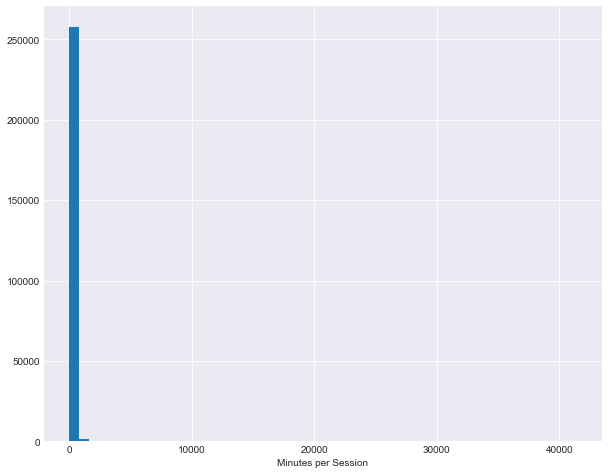

In [32]:
# Histogram of minutes per session
_, ax = plt.subplots(figsize=(10,8))
ax.hist(sessions.session_mins, bins=50)
ax.set_xlabel('Minutes per Session')
plt.show()

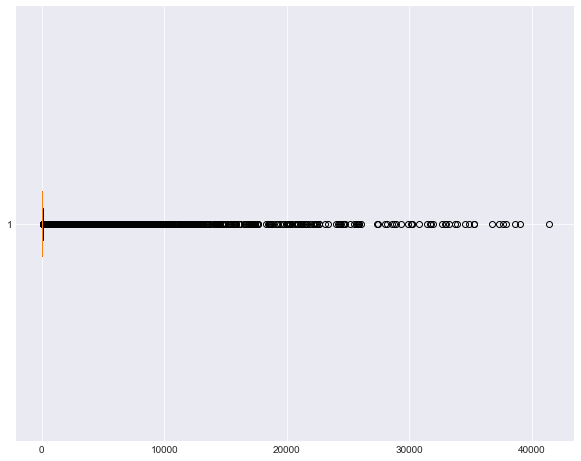

In [33]:
# Box plot of minutes per sessions
_, ax = plt.subplots(figsize=(10,8))
ax.boxplot(sessions.session_mins, vert=False)
plt.show()

### Most sessions last less than 1 hour in the app, but 25% of sessions last from 1 hour to 28 days.
What is up with sessions lasting for more than 12 hours?

In [34]:
long_sessions = sessions[sessions.session_length > '12:00:00']
long_sessions

,session_id,user_id,start_timestamp,end_timestamp,device_id,device_model,pages_viewed,session_length,session_mins
45,/x+wPRLQI41WXajZOFE3jp2BzVyic2d8Omw87u3pZFo=,2D/xipIdQVfrcliFiu1vnjnWFXmeSlvIe4aWNHTczCo=,2019-10-13 11:47:21+00:00,2019-10-14 12:14:50+00:00,Rca88jixNw+a19JJF7uvS71SaMkdtaLUKaxYIFjFrSw=,iPad Air,3,1 days 00:27:29,1467.483333
46,/zmuXierzSg0EcgUDnl1wJhyS2BGueXaSKkSVMZTSww=,Rac+At/DC+40FIVCWKyaY+mwEtAqKok8DA5h6n+JeT0=,2019-10-07 15:25:01+00:00,2019-10-08 03:27:00+00:00,qIBjVvUlJABL0qQFsgsEtXXbHlJSK217Nt0ns82jHFk=,iPad (6th gen),6,0 days 12:01:59,721.983333
139,4PXF8J//miNGMJQRx8ttMapBOIlPff54BF9Echq51Q0=,p9P2QZMhv32ofDL920GivpaIabBvD0PaaAVOK6wBhLc=,2019-10-17 04:35:50+00:00,2019-10-18 02:51:05+00:00,1ozPTdAOT7R6wAyRCsTYRwdfcYrkYu1yiLC/kEzHZ7k=,AFTM,0,0 days 22:15:15,1335.250000
186,6efOy6qL/ejzoV+zzhTsfSmKH9yWPDVsI/8x+dc+exI=,whTk6c0nyV3lOA4yMi69pLIKfqTXrVlr3m+/BV/fq68=,2019-10-06 18:42:36+00:00,2019-10-12 06:28:43+00:00,xCEum1c/7t+7iGhv7QwI30opGChAQ3fY4iKNi8rk+xw=,iPhone 7 Plus,10,5 days 11:46:07,7906.116667
219,8LYXAFW2eee/BlHNKhopTU0ypQwcqmoFmeRWIHlfZoo=,lq4lnPTs0Ln+oRBViBDZFOxtXipw20SSUk9KrZADv3c=,2019-10-12 14:02:21+00:00,2019-10-13 03:19:27+00:00,29xc69j5HWUjdtelhX5VS5L9t5fFMIUz2ECtS5pXtqk=,iPad mini 3,5,0 days 13:17:06,797.100000
...,...,...,...,...,...,...,...,...,...
260094,jeJ0TKOlPIcrQ9Ti83SNYI6CRMY2BdohsgJjE7WqLr4=,nHXO4KcSVCo+DomoZE3BtYvR/I8cCMHUzu0SQjldY0w=,2019-10-17 17:19:39+00:00,2019-10-19 01:13:23+00:00,WRpg2XnxHQ1a2c3jnEJ5RbCoGtP973qQP7Fy3Z92tK8=,iPhone 8 Plus,1,1 days 07:53:44,1913.733333
260195,ocv3mqEWav28O+WRxYeXf6XAg1aMYn3BiIxYxCYSwHQ=,fLi4zv+apA9SHZUmCOWNa9wher5kgq4GbbsM5oXhquE=,2019-10-06 05:03:52+00:00,2019-10-06 17:47:27+00:00,yOJtzmuWPp2nXhNpWg5I13ue41DDtwE7JC+wkXkFLhQ=,iPhone 8,2,0 days 12:43:35,763.583333
260227,qDdSWcUwS8PxKy/QUerDjvvikmBv2K0DK7HcCg0eeSE=,pExFgKV892IVEJi2Qwv75kEpacBYFypih7Wkl6eGDcM=,2019-10-10 19:09:03+00:00,2019-10-18 16:21:38+00:00,zdQ/MJzHv8EM43GvT/G2U/s2AFmYN51MjM6kPmvIxHk=,iPhone 6,1,7 days 21:12:35,11352.583333
260285,slm04t7a+3iI1iwVe7hGJHje7gZDHpOTSzLj05qrlZ4=,NPG5SACeKv7GIGGGtivQPrPO4jOzqft4X8lIM4K/k30=,2019-10-14 23:56:52+00:00,2019-10-18 02:53:10+00:00,gTMfHpSDkasYXxpNfQT0w788m+IVnATgyYosRApmHvc=,AFTM,1,3 days 02:56:18,4496.300000


In [35]:
# How many users are spending this much time on the app?
print(f'{long_sessions.user_id.nunique()} users spent more than 12 hours in the Stream App in Oct 2019. This is {round((long_sessions.user_id.nunique()/len(users))*100,2)}% of all users.')

1763 users spent more than 12 hours in the Stream App in Oct 2019. This is 8.23% of all users.


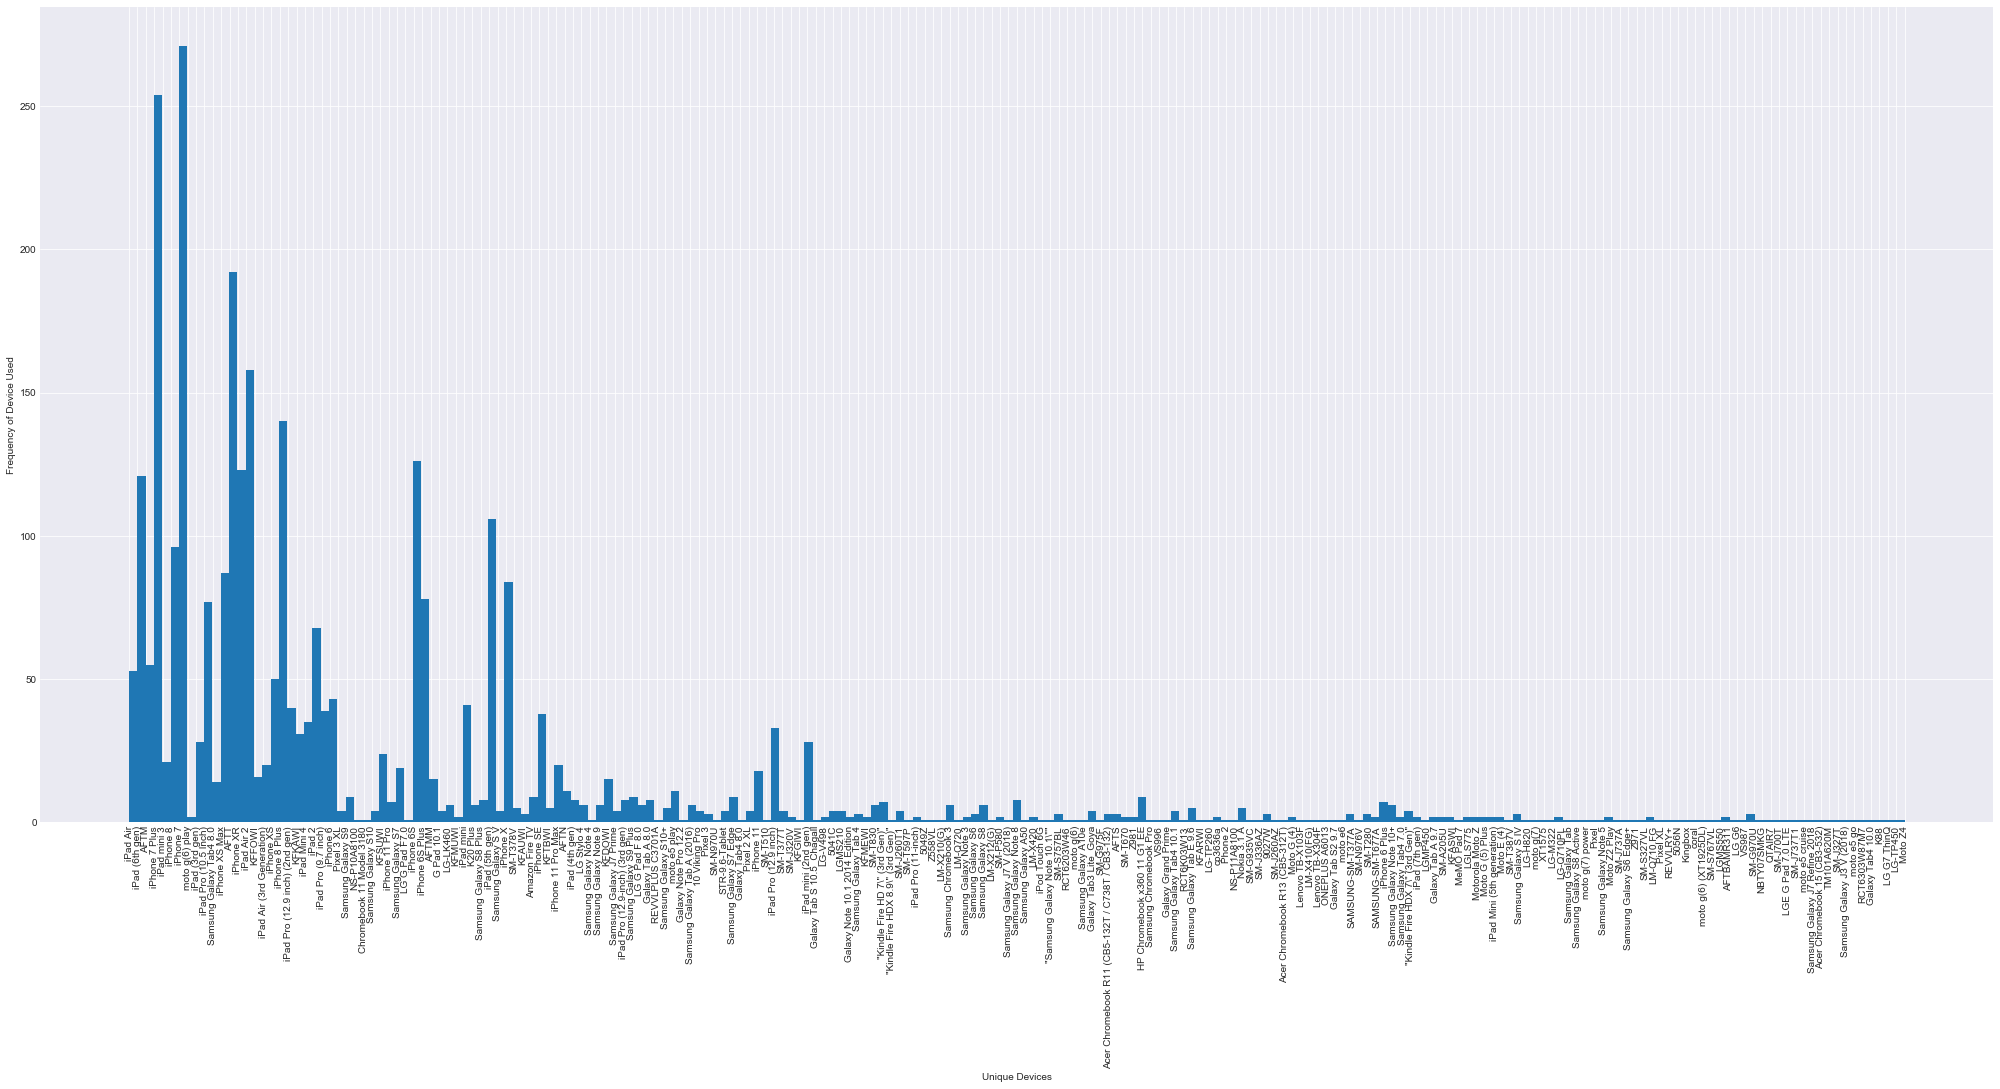

In [36]:
# What devices are these users using for the long sessions?
_, ax = plt.subplots(figsize=(35,15))
ax.hist(long_sessions.device_model, bins=long_sessions.device_model.nunique())
plt.xticks(rotation=90)
ax.set_xlabel('Unique Devices')
ax.set_ylabel('Frequency of Device Used')
plt.show()

## The graph is hard to see in this notebook, so let's take a look at the counts for each device.
It looks like iPhones are used the most by the users who use the app for more than 12 hours at a time. AFTT is also up there - AFTT = Amazon Fire TV (which makes sense - I used the Stream App on my Samsung TV before we got our STB).

In [37]:
long_sessions.groupby('device_model').count().sort_values('session_id', ascending=False)['session_id']

device_model
iPhone 7                                            271
iPhone 7 Plus                                       254
AFTT                                                192
iPad Air 2                                          158
iPhone 8 Plus                                       140
iPhone 6S                                           126
iPhone XR                                           123
iPad (6th gen)                                      121
iPad (5th gen)                                      106
iPhone 8                                             96
iPhone XS Max                                        87
iPhone X                                             84
iPhone 6S Plus                                       78
iPad Pro (10.5 Inch)                                 77
iPad 2                                               68
AFTM                                                 55
iPad Air                                             53
iPhone XS                          

#### I'm curious about the longest session. Let's see if we can find any video plays for the longest session.

In [38]:
long_sessions.sort_values('session_length', ascending=False).head(5)

,session_id,user_id,start_timestamp,end_timestamp,device_id,device_model,pages_viewed,session_length,session_mins
65048,sfrjvigRecNqGDZJcNQ8FvwBf7qS/VBwCAIdHanlwQI=,egp+D9EcgyKFYx2CWXR9I1wFwKY2mKim8DoyDNqVHEE=,2019-10-01 12:56:37+00:00,2019-10-30 06:46:37+00:00,0dxTtuafMOptuQaQFm30iMt71RdNu5ZKiINZu26hi8I=,Samsung Galaxy S10,1,28 days 17:50:00,41390.000000
191075,b/glqjW3OgMS6lAi/pdXY09dzbAxbRgIa190CUg3i8c=,wC5r9BGEXiTEuJmixf0sGaCcEI/qGN9puoyu/xyyD/s=,2019-10-01 13:25:10+00:00,2019-10-28 16:25:44+00:00,oqZmEkRlXRmsGUGkD2rvj0BEEvThrkxuP1Nv/iKCT0I=,iPhone XR,1,27 days 03:00:34,39060.566667
75762,5NPjjLoANgqrN99QeBfveFNDVWMS6dkysBjseYH4hNM=,yI/cK4fOLSKL6GEjAjTvY47EwPRP+57tU1IhDB48vaw=,2019-10-02 15:06:46+00:00,2019-10-29 10:46:23+00:00,B9hgVDMGW7XWFzgGaOExQ62WKR3wLItxmRG/v+UifMY=,iPhone 8,1,26 days 19:39:37,38619.616667
55593,fldbtSqs0P9Rd4+TwWm+4i8QaAVXZ4Ddn57knbQqS7c=,JiLejfIqRugZnYrZCKNgPKS/1CZ/K7Y124WYMbSs7uw=,2019-10-03 16:36:33+00:00,2019-10-30 00:04:29+00:00,Im6J8HBRzH1JIV7hcHcXxWnUKB5EQbd4+NWTwLhYFvU=,iPhone 8 Plus,28,26 days 07:27:56,37887.933333
217441,3+d1Jt0XUXpTB3HW6C3Ym3WF/l18mhHfSs88VtqOD/Q=,h7QpsAA00lVCO4X+HBAz8gxM4PTkIJDSijpkGm5fxAk=,2019-10-01 00:08:16+00:00,2019-10-27 03:37:17+00:00,zlmZXgFPXRg13HcTUE/vK/gFm/I95w/RonfWn18qsVg=,iPhone XS,1,26 days 03:29:01,37649.016667


#### The longest session did not correlate to any video plays and the device used was a phone, so maybe the user opened the app and forgot to close it but didn't use it for anything (the user only viewed one page, so they weren't doing much on the app) - this would probably be a good outlier to remove.

In [39]:
video_plays[video_plays.session_id == 'sfrjvigRecNqGDZJcNQ8FvwBf7qS/VBwCAIdHanlwQI=']

,session_id,user_id,timestamp,watch_type,provider,station,program_title,program_duration_seconds,viewed_seconds


### Most common devices used for ALL sessions

In [40]:
sessions.groupby('device_model').count().sort_values('session_id', ascending=False)

,session_id,user_id,start_timestamp,end_timestamp,device_id,pages_viewed,session_length,session_mins
device_model,,,,,,,,
iPhone XR,20340,20340,20340,20340,20340,20340,20340,20340
iPhone 8 Plus,15736,15736,15736,15736,15736,15736,15736,15736
iPhone X,14444,14444,14444,14444,14444,14444,14444,14444
iPhone XS Max,13047,13047,13047,13047,13047,13047,13047,13047
iPhone 8,12377,12377,12377,12377,12377,12377,12377,12377
...,...,...,...,...,...,...,...,...
LML414DL,1,1,1,1,1,1,1,1
SM-G935R4,1,1,1,1,1,1,1,1
Coolpad 3632A,1,1,1,1,1,1,1,1


### Number of Devices Used per User
This is similar to a common question within my current role, but we don't have access to data like this, so I am SUPER curious about this one.

In [41]:
devices_per_user = sessions.groupby('user_id').nunique()['device_model']
devices_per_user

user_id
+++rRr+Kv8mHAx7uTzgXNSNw3uXvTXeITYA54gD/Gqk=    1
++HR+BEyWa0wrqRlRE/adY2heKTFGnAtQ8bARSVBhJw=    2
++PidMEUcy5jni7o2WC2+zSgH8ZfzPeFwRqgENxohRs=    1
++Y5tD5sRDdc949pcgiPlCmijxKuj+0pkRB1di50PD8=    1
++sfVDyQT32mzYSlAudl+cBqMSPhqgHAFwkuUN6wX/I=    3
                                               ..
zzRlBXZvNfhUAv+JBZZNQmOPl5RxybCpVsqa9yuL0r4=    1
zzUxduzAPGy0neNTKK6RHuRNl+lVpajt3pcN8OtlATg=    2
zzdoJBK6+DrP9RdsRqSKkEbEo8WSE88T/c8SnZ9FL9w=    1
zzig4fJ65ib7XveBY1zYx//+SG3XCkUiafNSUdu+jU8=    1
zzzMUF7UEX1Kcg0eDaf1fVGP7WSO7CD+ucDbJqm11f0=    1
Name: device_model, Length: 16847, dtype: int64

#### Most users have 1 or 2 devices that they use for the Stream App, but some users have 12!!

In [42]:
devices_per_user.describe()

count    16847.000000
mean         1.494331
std          0.911142
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: device_model, dtype: float64

In [43]:
devices_per_user.sort_values(ascending=False)

user_id
vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=    12
ltpTEXDrXS1FD7FNhQgc2vzrUelp4yxKtQ/hoJjuBNE=    12
CPKTV0OOAD/dIfUtpIwzSsYiFErzUcXwIAl7OCmSKbU=    11
+qLlwLZ5/NP3blIWxDh8skED0agLw2BHalZ5NmCmfuk=    11
20BlZLXhI0y2Xca8QG3XygP/rKJWJK7t1ytbxvJcCUw=    10
                                                ..
aZ8y3PIxSsvwtJLEhj+Ix0XuPoEHwXjoc3SDxJsbZDk=     1
aYlbu7vmRRQL6djyNN8sw8pCyrMj5brXG09zSjjBV+k=     1
aYc5fAIh29gRD/S+j0IieB36WqG49mho8CnlW+XdQz0=     1
aYX2ouLcnxPqrYuMS1xI5gpM3HgZc/HTtowHfIeRBmU=     1
+++rRr+Kv8mHAx7uTzgXNSNw3uXvTXeITYA54gD/Gqk=     1
Name: device_model, Length: 16847, dtype: int64

In [44]:
# Looking at the user with the most devices - wondering if maybe this is a family that all share one account?
sessions[sessions.user_id == 'vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=']

,session_id,user_id,start_timestamp,end_timestamp,device_id,device_model,pages_viewed,session_length,session_mins
506,LZMnUtetWMM1Z9f3BvSbwa8gPhUQE8UJM9osdt7HlYM=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-31 19:34:50+00:00,2019-10-31 19:34:52+00:00,twbFn+pIRvVSFR1bsQ/flbC3wQLGxxnjmoI4YsPvWjY=,iPhone 8 Plus,1,0 days 00:00:02,0.033333
2128,cRlt49obBVHNBUl3HGTPu/ZL+WjByoqez+80H8YMg1U=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-21 00:34:45+00:00,2019-10-21 00:49:54+00:00,16qOLmO55LV2ZVDf5LFmo+Dk2x/NyHZCaBMGUibbQ+k=,Pixel 2,7,0 days 00:15:09,15.150000
2312,lVc/J9rNP64fN/Y0IAvJPoEg4Aipvm6zxr8+0pAKKxQ=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-12 01:08:01+00:00,2019-10-12 02:35:00+00:00,JhGj6ovp+OyiBlFwty1e2llhZ7KHc75iE0jSdgbcHgw=,iPhone X,8,0 days 01:26:59,86.983333
4297,Hb7xrdFeEQpXHffK292XK2Kgsp8zjCJpUxIyQEalK2o=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-14 00:47:52+00:00,2019-10-14 00:48:03+00:00,KC3e3avvgreIn0x+fP9rnDF2q0F/7CvZZjaFPYzBFjU=,iPhone X,1,0 days 00:00:11,0.183333
4712,bvKjdn/y++x1WrLPQN2lSDWpwzF4bm90pIJD1W+rJQo=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-21 23:57:30+00:00,2019-10-22 00:04:51+00:00,16qOLmO55LV2ZVDf5LFmo+Dk2x/NyHZCaBMGUibbQ+k=,Pixel 2,5,0 days 00:07:21,7.350000
10424,zVdQY1lL8dDYU3KrYKLYydI+EXXTNhIXfR7t91Vg/rw=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-29 02:50:05+00:00,2019-10-29 02:51:29+00:00,yVnSDuyJgsiEwJakP3D1w6g2FQ9b3Nx+Wb47Czk5W4M=,iPad Air 2,6,0 days 00:01:24,1.400000
11444,mEmAXrHmwoK7HCckx10lZfubd/JNRwNlBCXniiK55mA=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-12 00:05:52+00:00,2019-10-12 00:10:20+00:00,vAW3UN8ESs1fEwh4EMSIa+q1KPE0W1b3G4j1NM5ZgO8=,iPhone XS,4,0 days 00:04:28,4.466667
13329,988S+2xCSZF5mn4GEBR4zFjVMvf3jXpuvpWXadzTG6M=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-27 04:13:43+00:00,2019-10-27 05:03:07+00:00,Y/OO/AtQ/m+h6IRpt8eVj6x42qxYpvARietxxERwwYY=,iPhone X,4,0 days 00:49:24,49.400000
15373,gktRHBy6fdtDnyCbWcpCaM3//ehvcxDBVEvkfYQuFZo=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-20 04:59:25+00:00,2019-10-20 04:59:35+00:00,KC3e3avvgreIn0x+fP9rnDF2q0F/7CvZZjaFPYzBFjU=,iPhone X,1,0 days 00:00:10,0.166667
22234,wHy6985ofyv144DF/C02nOM8Ht02lklAc4y2k8bfBjE=,vN0/e39qE2Qg8JsEJmxRns0oIeKecxC9N7cQwRhGB4s=,2019-10-20 22:49:18+00:00,2019-10-20 22:50:51+00:00,m7PJ5Fk07JBDmrCnIjA57FnxEvCdN5R7N0CvzKBBDp0=,iPhone XS Max,5,0 days 00:01:33,1.550000


#### How often are users using the app?

In [45]:
sessions_per_user = sessions.groupby('user_id').nunique()['session_id']
sessions_per_user.head(10)

user_id
+++rRr+Kv8mHAx7uTzgXNSNw3uXvTXeITYA54gD/Gqk=     2
++HR+BEyWa0wrqRlRE/adY2heKTFGnAtQ8bARSVBhJw=     4
++PidMEUcy5jni7o2WC2+zSgH8ZfzPeFwRqgENxohRs=    38
++Y5tD5sRDdc949pcgiPlCmijxKuj+0pkRB1di50PD8=    13
++sfVDyQT32mzYSlAudl+cBqMSPhqgHAFwkuUN6wX/I=    12
+/eVGOESLNT50iebB54bydfi2HaTJ7smRrTam/uPqQg=     3
+0+oS+gH9UHPh3HSJ23AkBC0+Y2x0srIrZKGA8fU5Us=     1
+0DdaFHgv/DP+6FbTDt2KI6wkX/oP2MxKfr2fsb21W0=     3
+0cmCM7jDTz+Zn7vj1RqgmSmgjvt01bH0D2rw5XFxUc=    16
+0dXS8odjORX551TcB63o499ubIp8gRr4YQ+DFi/4XE=     2
Name: session_id, dtype: int64

In [46]:
sessions_per_user.sort_values(ascending=False)

user_id
QrPoaHFUOuzTH03dTjuZ8vi4ugzMaoMGxSOlBUo/YRA=    440
7xGO5uJLecxK1iMF73gyc3Hz2EXF3V05xD2SJaPA7Ok=    327
g4ZHvYAsNOJammWPBfVxZV1qvXEUiGDCXt9Egb4nKFc=    312
ltpTEXDrXS1FD7FNhQgc2vzrUelp4yxKtQ/hoJjuBNE=    302
hepu4iFgPjd8rTPZLD20f0xK0LL2BU7Np904dET9QN8=    282
                                               ... 
ZEI6OpKYdvZSWRa3SL2fXdni6u+b5KH4+HlsqEC5vBA=      1
B+Kuc/xS1NE4sWL4GZQI9Uh1A/xuP/Nm58Jz7OHBS8Q=      1
B+dI6cnEz7HmojR3VnYFu7dRBEaknasgz5SKJpVvz94=      1
ZDnGW0CQSsqXBWK8q12jddiF3xzi4Fn3Ns1LMtQLJrA=      1
zzzMUF7UEX1Kcg0eDaf1fVGP7WSO7CD+ucDbJqm11f0=      1
Name: session_id, Length: 16847, dtype: int64

#### Most users only used the app a handful of times in Oct 2019, but 25% of users used the app 17-440 times.

In [47]:
sessions_per_user.describe()

count    16847.000000
mean        15.458301
std         26.775114
min          1.000000
25%          1.000000
50%          5.000000
75%         17.000000
max        440.000000
Name: session_id, dtype: float64

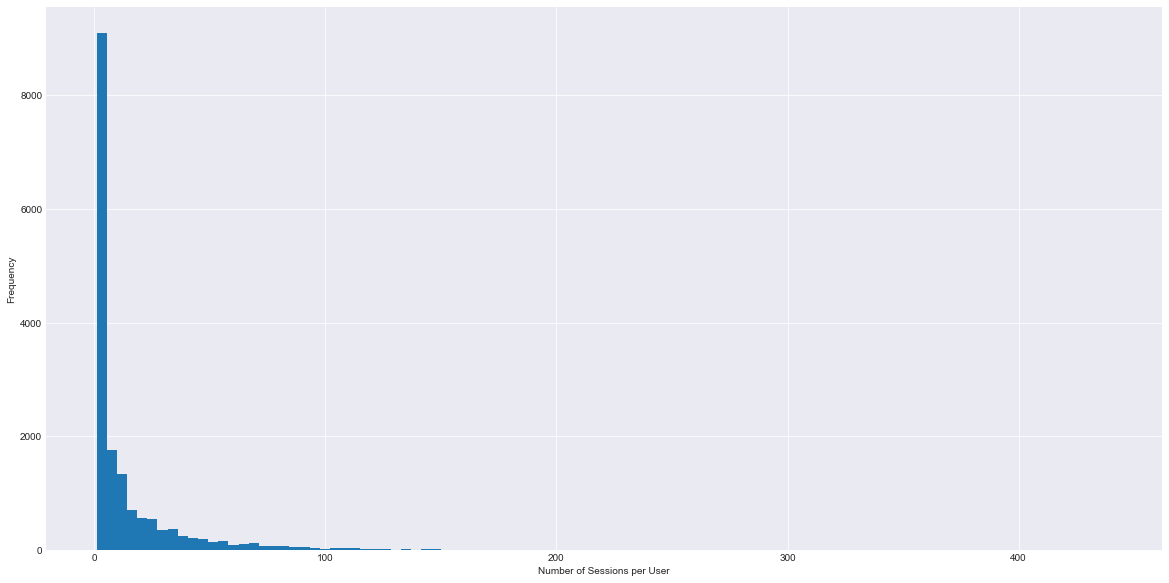

In [48]:
# Histogram to see the distribution better
_, ax = plt.subplots(figsize=(20,10))
ax.hist(sessions_per_user, bins=100)
ax.set_xlabel('Number of Sessions per User')
ax.set_ylabel('Frequency')
plt.show()

# Video Plays Dataset

In [49]:
video_plays

,session_id,user_id,timestamp,watch_type,provider,station,program_title,program_duration_seconds,viewed_seconds
0,CeHoRpFTYGnUx+vx2Ju2XTavgOwWXuTlV2tohdeYIKI=,/enyajf1gdn+1iC4jIcqDdwAYSI2n4UzB6pXg000IoY=,2019-10-01T00:40:02.000Z,Live,NaN,WPBFD,DancingWiththeStars,7200,12
1,25qgPi6bRpfZPadamy1ppJ6xMsDWMj5pKBa7PhCH7L0=,RNmWowYHgoYdQ9oK6bb0SK9HTJohpTbV998w9zSAmIQ=,2019-10-01T02:05:48.000Z,On-Demand,NickJr.,NaN,BlazeandtheMonsterMachines,1402,443
2,D8WRCi1tVPbZAUHG8Ek2j/1XKweEXm9aycdP/MaknCU=,9d+ASDQVqbQhX9MQVciRVCG4HigFYGfve7B9hF5hlHc=,2019-10-01T19:19:35.000Z,On-Demand,MTV,NaN,TeenMom2,3178,2
3,D8WRCi1tVPbZAUHG8Ek2j/1XKweEXm9aycdP/MaknCU=,9d+ASDQVqbQhX9MQVciRVCG4HigFYGfve7B9hF5hlHc=,2019-10-01T19:22:59.000Z,On-Demand,MTV,NaN,TeenMom2,3201,202
4,D8WRCi1tVPbZAUHG8Ek2j/1XKweEXm9aycdP/MaknCU=,9d+ASDQVqbQhX9MQVciRVCG4HigFYGfve7B9hF5hlHc=,2019-10-01T19:19:27.000Z,On-Demand,MTV,NaN,TeenMom2,3230,3077
...,...,...,...,...,...,...,...,...,...
548334,+GgIPkURWX/YSfoQcWwTXqyNKgDcyQIDRGp3Xf5z5Ko=,0wq5tyqmuZQxpA5+4XYDt5pRPo/32nXEyVUMadmkVeA=,2019-10-05T04:01:20.000Z,Live,NaN,SUNTV,Law&Order,3600,78
548335,B/ZLXH6DxV0JrjMSpG0ikJmXnGDC53r/kj+hK1wnshg=,gaq0RucEPiCfdTIgMFs2K/utrH5WAXKMKkLwNbmtvyw=,2019-10-05T01:58:15.000Z,Live,NaN,WFLDD,FridayNightSmackDown,7200,7018
548336,ilevC1jM9ZBT3nOeGCQcJbKjDwkpT2yWUVCIaU10C+E=,0NSVr5XfhWbsMa0MGMbHqEL8B31qzJjIQBBzpU71pAM=,2019-10-05T14:33:47.000Z,DVR,NaN,VH1HD,BasketballWives,3660,1105
548337,ldv+3ExQnLMR7UUGwGuGKT3BUVQ3RKlIyS173Ji9zes=,nUnCToiRBfYZ20lQxpEvuikzd9Ud6sp8v4XaEl5Xb3c=,2019-10-05T03:24:22.000Z,Live,NaN,KFSND,AmericanHousewife,1800,3


In [50]:
video_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548339 entries, 0 to 548338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   session_id                548339 non-null  object
 1   user_id                   548339 non-null  object
 2   timestamp                 548339 non-null  object
 3   watch_type                548339 non-null  object
 4   provider                  85451 non-null   object
 5   station                   462849 non-null  object
 6   program_title             547588 non-null  object
 7   program_duration_seconds  548339 non-null  int64 
 8   viewed_seconds            548339 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 37.7+ MB


In [51]:
# Convert timestamp to datetime object
video_plays.timestamp = pd.to_datetime(video_plays.timestamp)

In [52]:
# Confirm conversion
video_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548339 entries, 0 to 548338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   session_id                548339 non-null  object             
 1   user_id                   548339 non-null  object             
 2   timestamp                 548339 non-null  datetime64[ns, UTC]
 3   watch_type                548339 non-null  object             
 4   provider                  85451 non-null   object             
 5   station                   462849 non-null  object             
 6   program_title             547588 non-null  object             
 7   program_duration_seconds  548339 non-null  int64              
 8   viewed_seconds            548339 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 37.7+ MB


In [53]:
video_plays.describe()

,program_duration_seconds,viewed_seconds
count,548339.000000,548339.000000
mean,5317.352342,861.377128
std,4171.473291,1397.424224
min,0.000000,0.000000
25%,3107.000000,15.000000
50%,3600.000000,226.000000
75%,7200.000000,1274.000000
max,534569.000000,170842.000000


#### Checking if the first and last start timestamps for video plays matches sessions

In [54]:
# What is the earliest start date of a video play?
video_plays.timestamp.sort_values(ignore_index=True)[0]

Timestamp('2019-10-01 00:00:00+0000', tz='UTC')

In [55]:
# What is the latest start date of a session?
video_plays.timestamp.sort_values(ascending=False,ignore_index=True)[0]

Timestamp('2019-10-31 23:59:59+0000', tz='UTC')

#### How much of a program do users watch?

In [56]:
# Create a column for percentage of program viewed
video_plays['pct_watched'] = (video_plays['viewed_seconds'] / video_plays['program_duration_seconds']) * 100

#### Most users watched < 50% of  any of the videos they played overall, but some users watched MUCH longer past the end of the program (as shown by the max being 8334 %) - split up by watch type gives us a better idea

In [57]:
video_plays.describe()

,program_duration_seconds,viewed_seconds,pct_watched
count,548339.000000,548339.000000,547859.000000
mean,5317.352342,861.377128,23.885164
std,4171.473291,1397.424224,37.778845
min,0.000000,0.000000,0.000000
25%,3107.000000,15.000000,0.292398
50%,3600.000000,226.000000,4.722222
75%,7200.000000,1274.000000,34.666667
max,534569.000000,170842.000000,8334.666667


##### On-Demand programs have the most percent watched if we look at the median (due to the high maxes, these would probably be a better indicator of user behavior until we deal with the values over 100%), followed closely by DVR, then Purchase, Rental, Live. However, DVR has the highest max for percent watched by a significant amount. All of the max percentage are over 100, meaning the user watched more than the length of the program, so I would definitely want to look into these outliers and see what's going on.

In [58]:
video_plays.groupby('watch_type').describe()['pct_watched']

,count,mean,std,min,25%,50%,75%,max
watch_type,,,,,,,,
DVR,65855.0,37.407810,51.074373,0.0,3.361111,25.722222,69.857890,8334.666667
Live,396549.0,17.677436,31.570943,0.0,0.166667,2.500000,17.805556,2220.694444
On-Demand,84268.0,42.443231,43.170481,0.0,2.242304,26.470588,92.166173,3594.813278
Purchase,926.0,33.448505,36.138856,0.0,2.095654,15.773106,69.361111,110.198456
Rental,261.0,17.860234,27.354914,0.0,0.077300,4.132810,25.289855,124.639898


#### Most video plays are Live, then On-Demand, DVR, Purchase and Rental

In [59]:
video_plays.groupby('watch_type').count()['session_id']

watch_type
DVR           65858
Live         397026
On-Demand     84268
Purchase        926
Rental          261
Name: session_id, dtype: int64

### What time of day did most users watch on the app?

In [60]:
# Create an hour, day, and week column
video_plays['hour'] = video_plays.timestamp.dt.hour
video_plays['day'] = video_plays.timestamp.dt.day
video_plays['week'] = video_plays.timestamp.dt.week

#### Most video plays occur between 0-4 AM UTC (as seen in the top graph), which makes me think all of these users are from the East Coast since this time corresponds to primetime on the East Coast.
#### Video plays were fairly consistent throughout the month (as seen in the lower graph), but there was a spike on Oct 23/24.

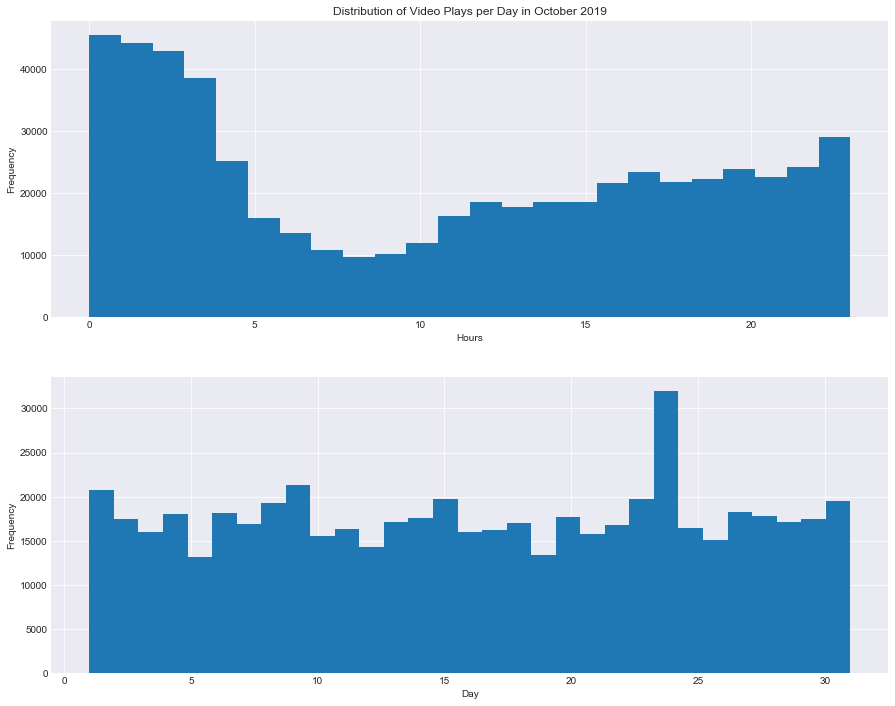

In [61]:
# Create a graph to view the distibution across all hours and days
_, ax = plt.subplots(2,figsize=(15,12))
ax[0].hist(video_plays.hour, bins=24)
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Video Plays per Hour')

ax[1].hist(video_plays.day,bins=31)
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Frequency')
ax[0].set_title('Distribution of Video Plays per Day in October 2019')

plt.show()

## How many videos per session did users start?

In [62]:
videos_per_session = video_plays.groupby('session_id').count()['user_id']

In [63]:
videos_per_session

session_id
++/+/QzwK7s11TmOolDGIyueRi+HOeZU00O1wi9RGLc=      9
++1WXugyIrHaYhl86ixQaKZVMlhDwXCyfixUpPqfJM8=      1
++2dNoROyB6BIEw9cRXQGN0XW5C/Eeh/HiNIVd0L7dc=      1
++3fLup41OTjwyrKlmPVloRilqyOor0afuTclSTtjHg=      3
++4Szesa97AIIsQN0txuWdcm5c0T+1k2U65Bo58/LQo=      1
                                               ... 
zzvw7xP16pUrefKTKcnxSfRf7K/VTrDLKWN3yEc+mdc=      2
zzvxvRopaUNWTidPTtWtckFk/nXFT4ojbLQUVPCTFcA=      1
zzwhVS8/csfSf7JCZfJouqrgUS1b3afM1HUw5iLHGRw=      3
zzwz2X5WpUZ4MeADP94n+Z2Xzowl0Y6G6DTU3SBocMs=    261
zzxXEVBbIK0og4G1bt7B0iAd6vtRUDUaA5eTtACh22w=      3
Name: user_id, Length: 142063, dtype: int64

In [64]:
videos_per_session.describe()

count    142063.000000
mean          3.859830
std          43.102328
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max       14422.000000
Name: user_id, dtype: float64

##### The max is 14,422 video plays in one session!! 

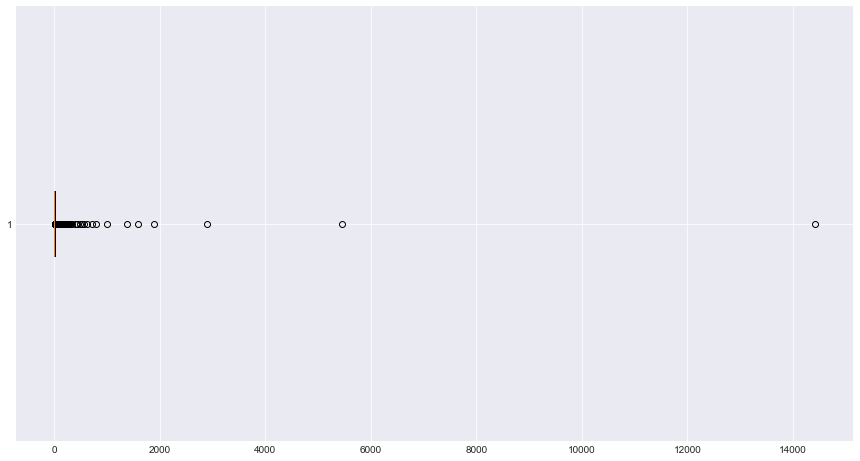

In [65]:
# Box plot so we can see the outliers
_, ax = plt.subplots(figsize=(15,8))
ax.boxplot(videos_per_session,vert=False)
plt.show()

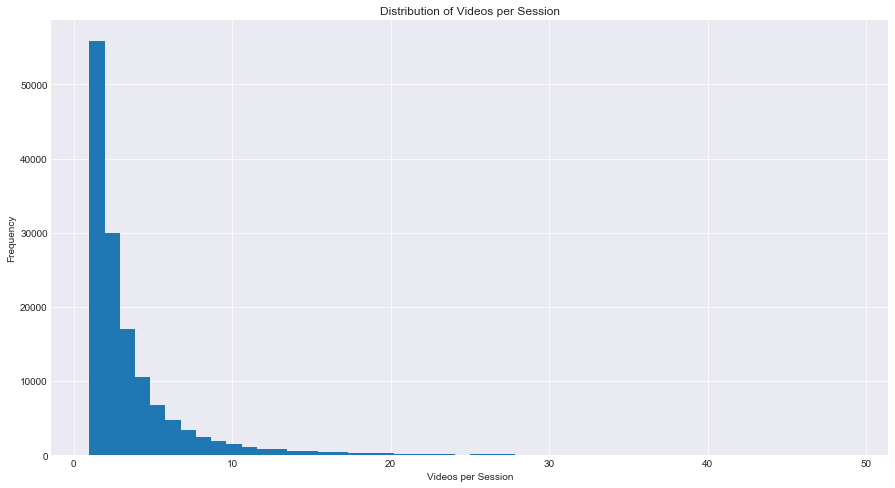

In [66]:
# Narrowing down to only look at sessions with < 50 video plays so we can see the distribution
_, ax = plt.subplots(figsize=(15,8))
ax.hist(videos_per_session[videos_per_session < 50], bins=50)
ax.set_xlabel('Videos per Session')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Videos per Session')
plt.show()

##### Most sessions only have one video play, but a substantial number have up to 12 or so.

## What was the most common provider, station and program?
###### This section sometimes kills my kernel when I run all three cells in a row, but I'm not entirely sure why! Just a warning in case it happens when you are running this code.

##### The top 5 providers in Oct 2019 were HBO, NBC, STARZ, ABC and TLC.  

In [69]:
videos_gb_provider = video_plays.groupby('provider').count()['session_id']
videos_gb_provider.sort_values(ascending=False).head(10)

provider
HBO         8154
NBC         5523
STARZ       5019
ABC         4918
TLC         3953
MTV         3890
VH1         3819
Bravo       3493
FOX         3058
Showtime    2664
Name: session_id, dtype: int64

##### The top 5 stations were MSNBC, CNNHD, ESPND, FNCHD, and FS1HD.  


In [87]:
videos_gb_station = video_plays.groupby('station').count()['session_id']
videos_gb_station.sort_values(ascending=False).head(10)

station
MSNBC    30268
CNNHD    28776
ESPND    28016
FNCHD    21442
FS1HD    17820
TOON     14517
TBSHD    11130
TNTHD     8544
VH1HD     6389
KRIVD     6238
Name: session_id, dtype: int64

##### The top 5 programs were MLB Playoffs, Family Guy, Monday Night Football, 2019 World Series, and Outdaughtered.

In [70]:
videos_gb_program = video_plays.groupby('program_title').count()['session_id']
videos_gb_program.sort_values(ascending=False).head(10)

program_title
MLBPlayoffs              16576
FamilyGuy                15655
MondayNightFootball       7393
2019WorldSeries           7142
Outdaughtered             6082
SundayNightFootball       5319
ThursdayNightFootball     5316
SportsCenter              4612
Power                     4572
MorningJoe                4561
Name: session_id, dtype: int64

# Create charts for daily and weekly user counts.

I am going to make a chart that shows the daily and weekly user counts for sessions and for video plays.

In [71]:
# Add day and week columns to sessions df
sessions['day'] = sessions.start_timestamp.dt.day
sessions['week'] = sessions.start_timestamp.dt.week

In [72]:
user_sessions_per_day = sessions.groupby('day').nunique()['user_id']
user_sessions_per_week = sessions.groupby('week').nunique()['user_id']

#### Charts for the count of daily and weekly unique users to start a session

In [73]:
# Create a function for making the daily and weekly plots
def plot_daily_and_weekly(daily_data, weekly_data, ylabel, title):
    _, ax = plt.subplots(2, figsize=(20,20))
    ax[0].plot(daily_data)
    ax[0].set_xlabel('Day',fontsize=16)
    ax[0].set_ylabel(ylabel,fontsize=16)
    ax[0].set_title(f'{title} (Per Day)',fontsize=20)
    ax[0].set_xticks(np.arange(1,32))
    ax[0].set_xticklabels(np.sort(sessions.day.unique()))

    ax[1].plot(weekly_data)
    ax[1].set_xlabel('Week',fontsize=16)
    ax[1].set_ylabel(ylabel,fontsize=16)
    ax[1].set_title(f'{title} (Per Week)',fontsize=20)
    # Change the x labels to the week dates instead of week number
    week_labels = ['10/1-10/6','10/7-10/13','10/14-10/20','10/21-10/27','10/28-10/31']
    start, end = ax[1].get_xlim()
    ax[1].xaxis.set_ticks(np.arange(start, end, 1))
    ax[1].set_xticklabels(week_labels)

    plt.show()

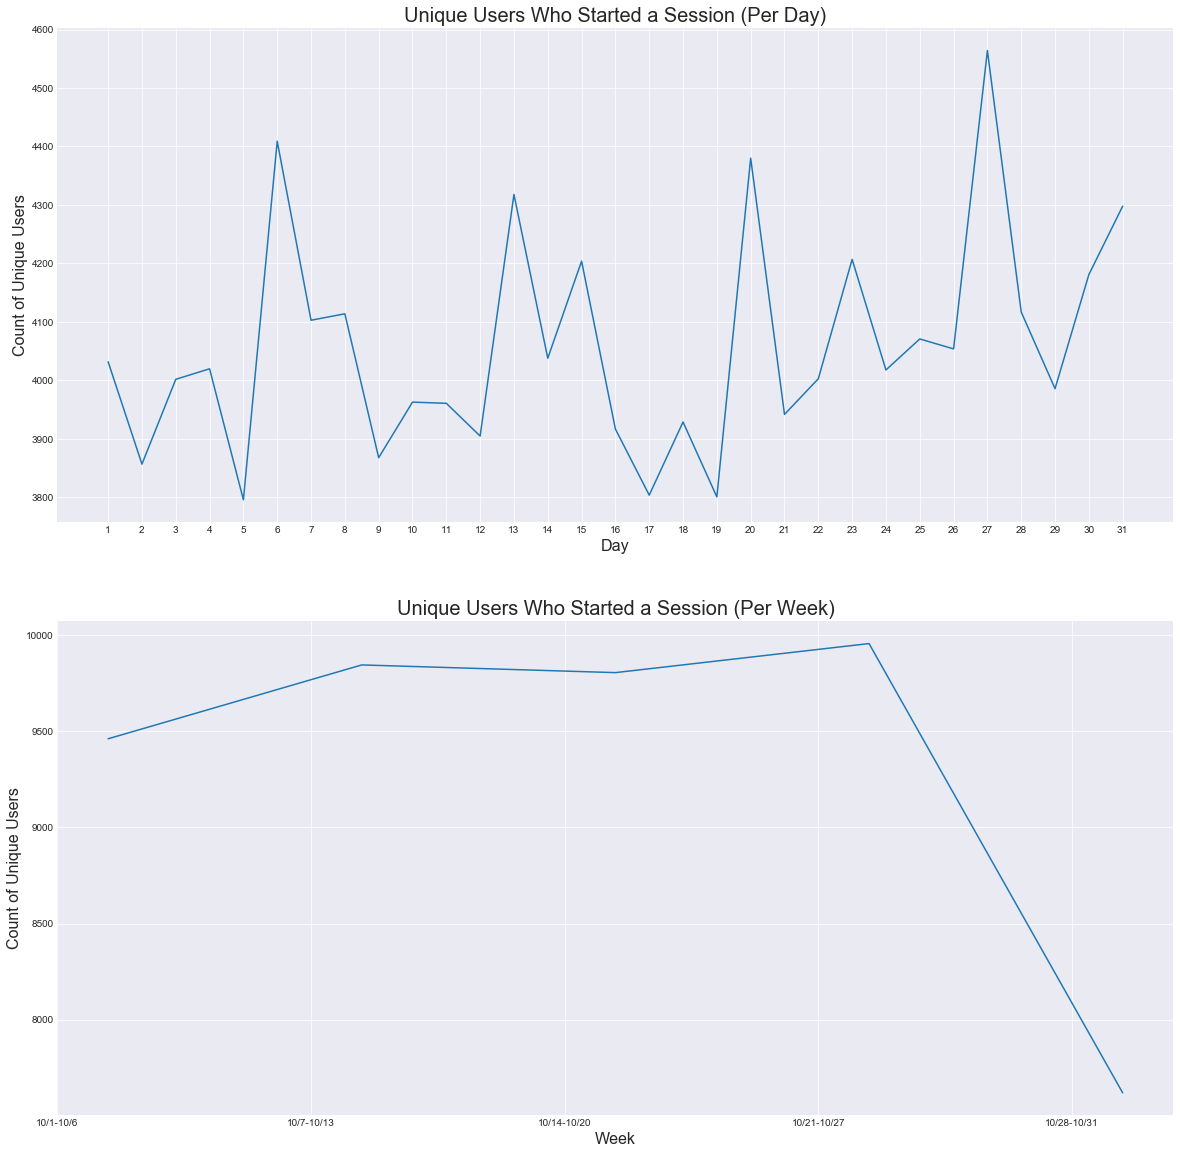

In [74]:
plot_daily_and_weekly(user_sessions_per_day,
                      user_sessions_per_week,
                      'Count of Unique Users',
                      'Unique Users Who Started a Session')

The most active day for unique users who started a session was October 27, and the most active week was the week including 10/21-10/27.  
There appears to be a BIG drop in unique users during the last week of October, but we need to remember that week 44 includes 3 days of November, which are NOT included in our data. We cannot conclude that the week 44 has the lowest number of users until we have that data.

#### Charts for the count of daily and weekly unique users to play a video

In [75]:
user_plays_per_day = video_plays.groupby('day').nunique()['user_id']
user_plays_per_week = video_plays.groupby('week').nunique()['user_id']

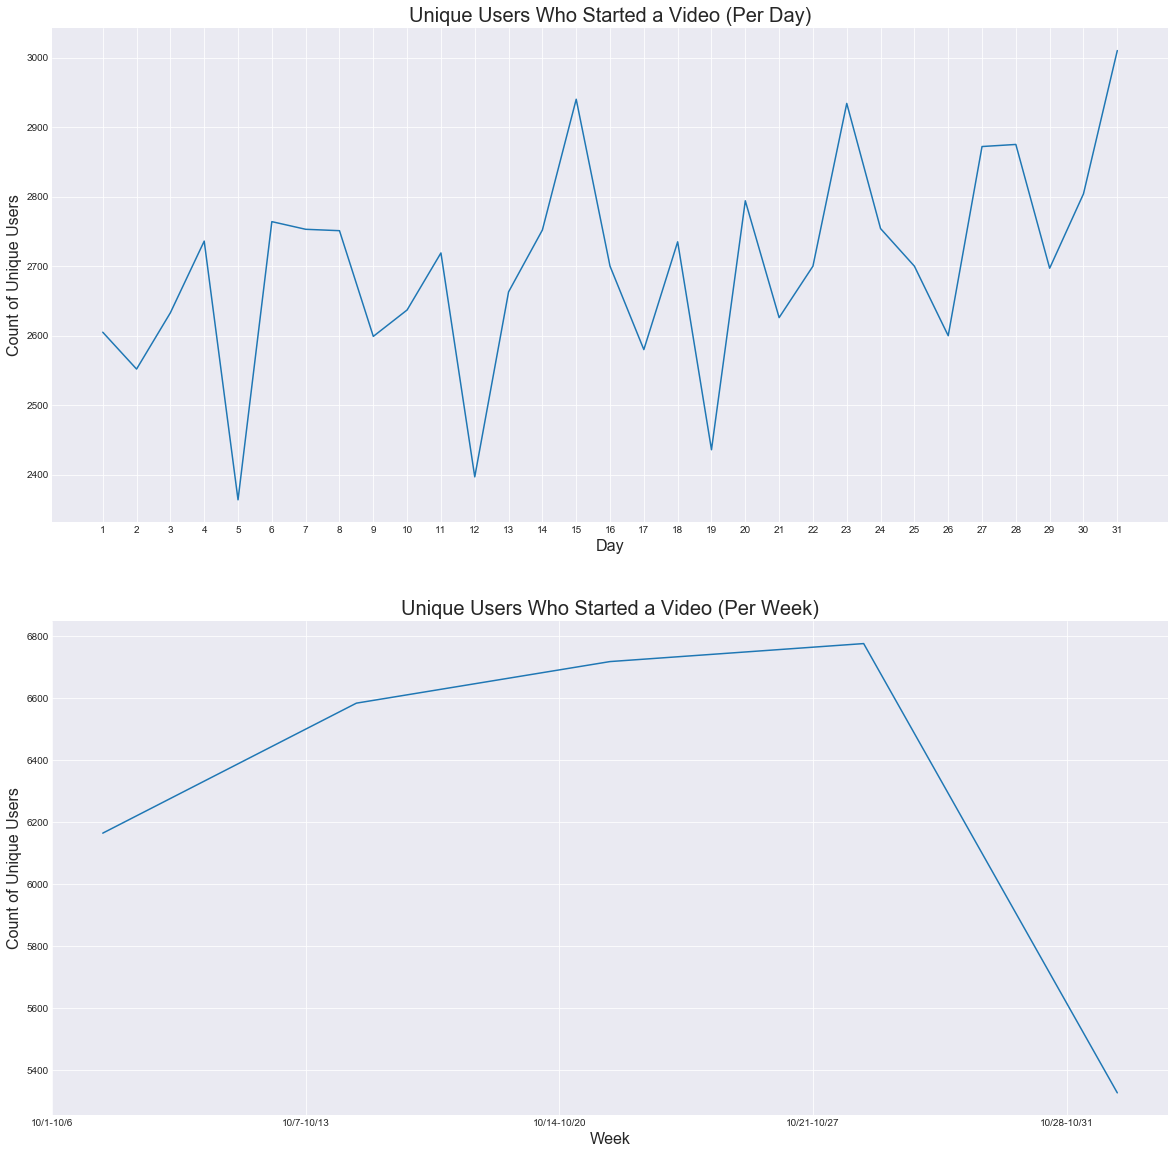

In [76]:
plot_daily_and_weekly(user_plays_per_day, 
                      user_plays_per_week, 
                      'Count of Unique Users', 
                      'Unique Users Who Started a Video')

The most active day for unique users watching videos was Halloween! Which makes sense since there are many Halloween and horror films that people like to watch on Halloween.
Similary to sessions, the most active week for unique users watching videos was the week of 10/21-10/27, with a big dip the following week (for the same reason as above).

### Charts for Raw Daily and Weekly Counts for Sessions and Video Plays

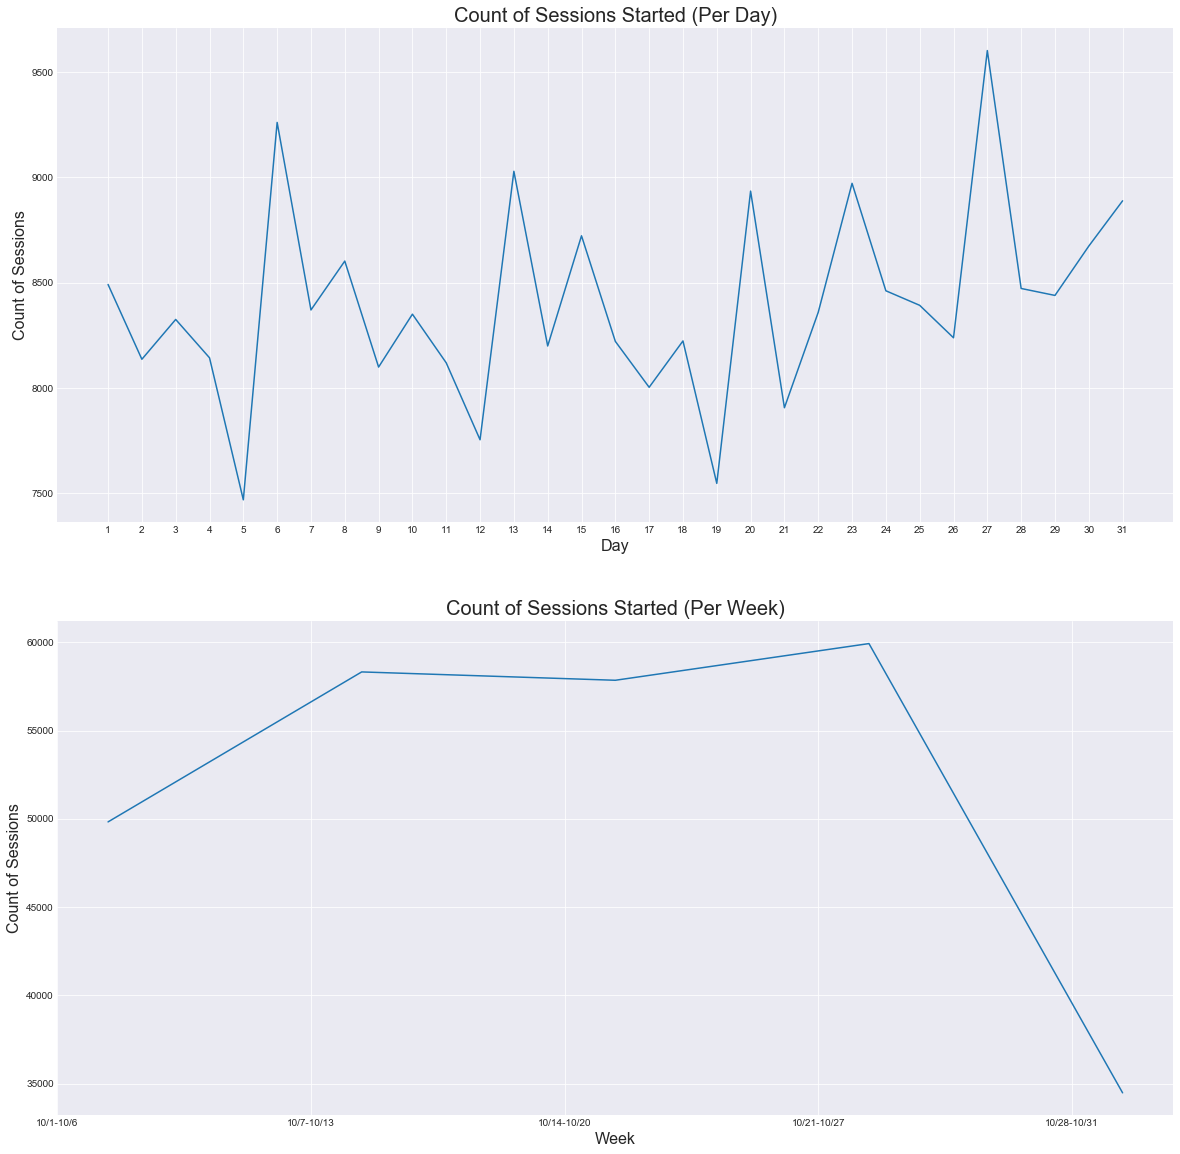

In [77]:
plot_daily_and_weekly(sessions.groupby('day').count()['user_id'],
                      sessions.groupby('week').count()['user_id'],
                      'Count of Sessions',
                      'Count of Sessions Started')

The raw number of sessions saw the same most active days as the unique users - October 27 and the week of 10/21-10/27.

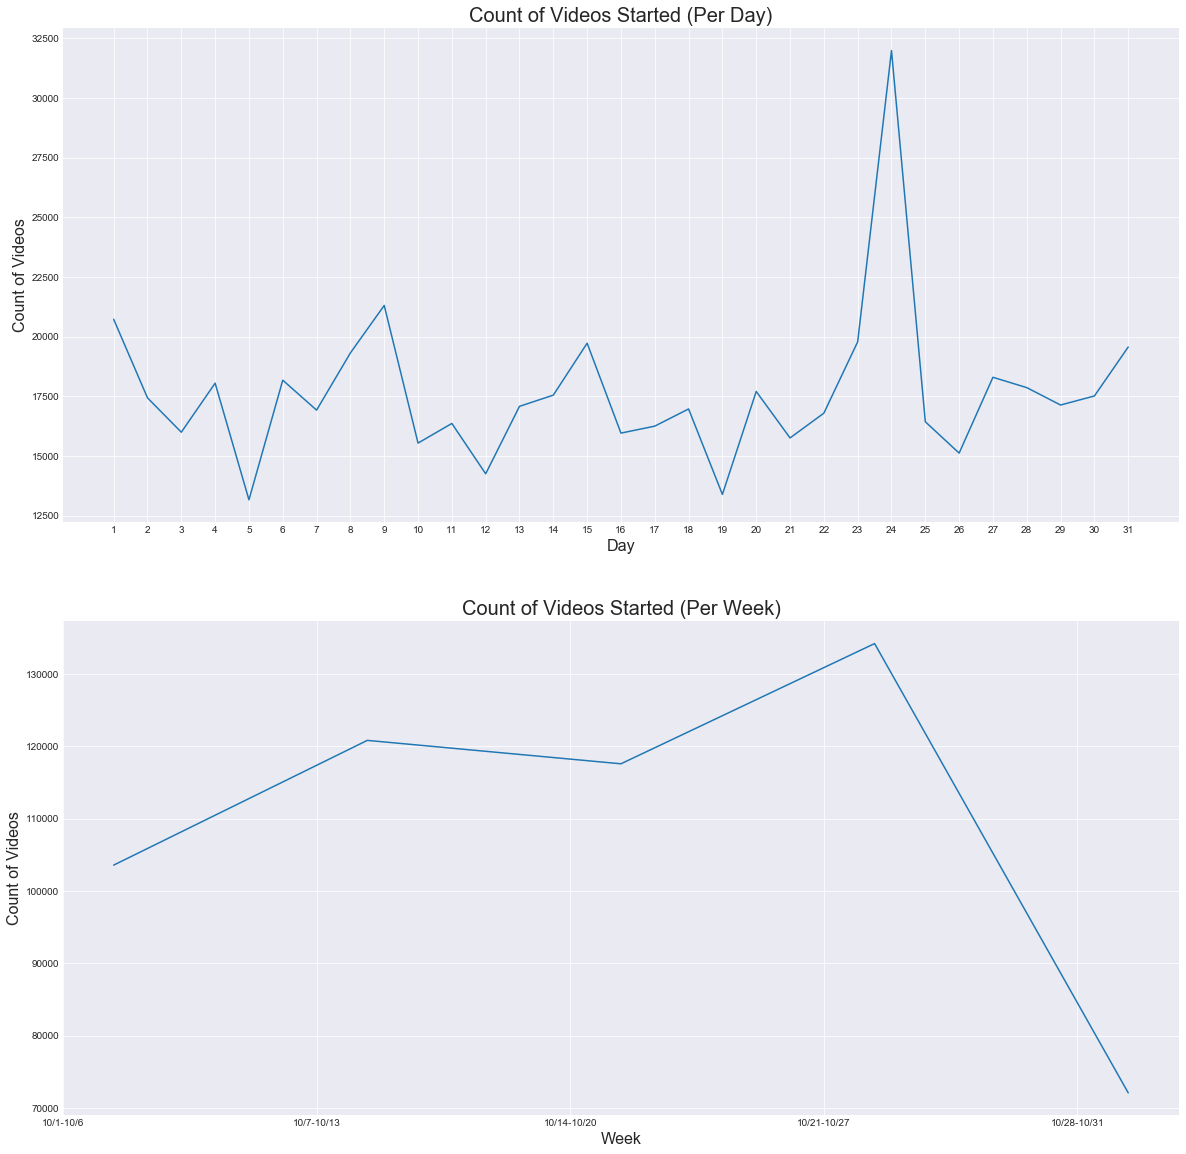

In [78]:
plot_daily_and_weekly(video_plays.groupby('day').count()['user_id'],
                    video_plays.groupby('week').count()['user_id'],
                    'Count of Videos', 
                    'Count of Videos Started')

Video plays, however, saw the most active day on October 24 for raw counts, as opposed to Halloween for the most active day for unique users. The peak week is the same.

# Identify what percentage of users play a video on a daily and weekly basis.

In [79]:
total_users = len(users)
pct_user_plays_per_day = (video_plays.groupby('day').nunique()['user_id']/total_users)*100
pct_user_plays_per_week = (video_plays.groupby('week').nunique()['user_id']/total_users)*100

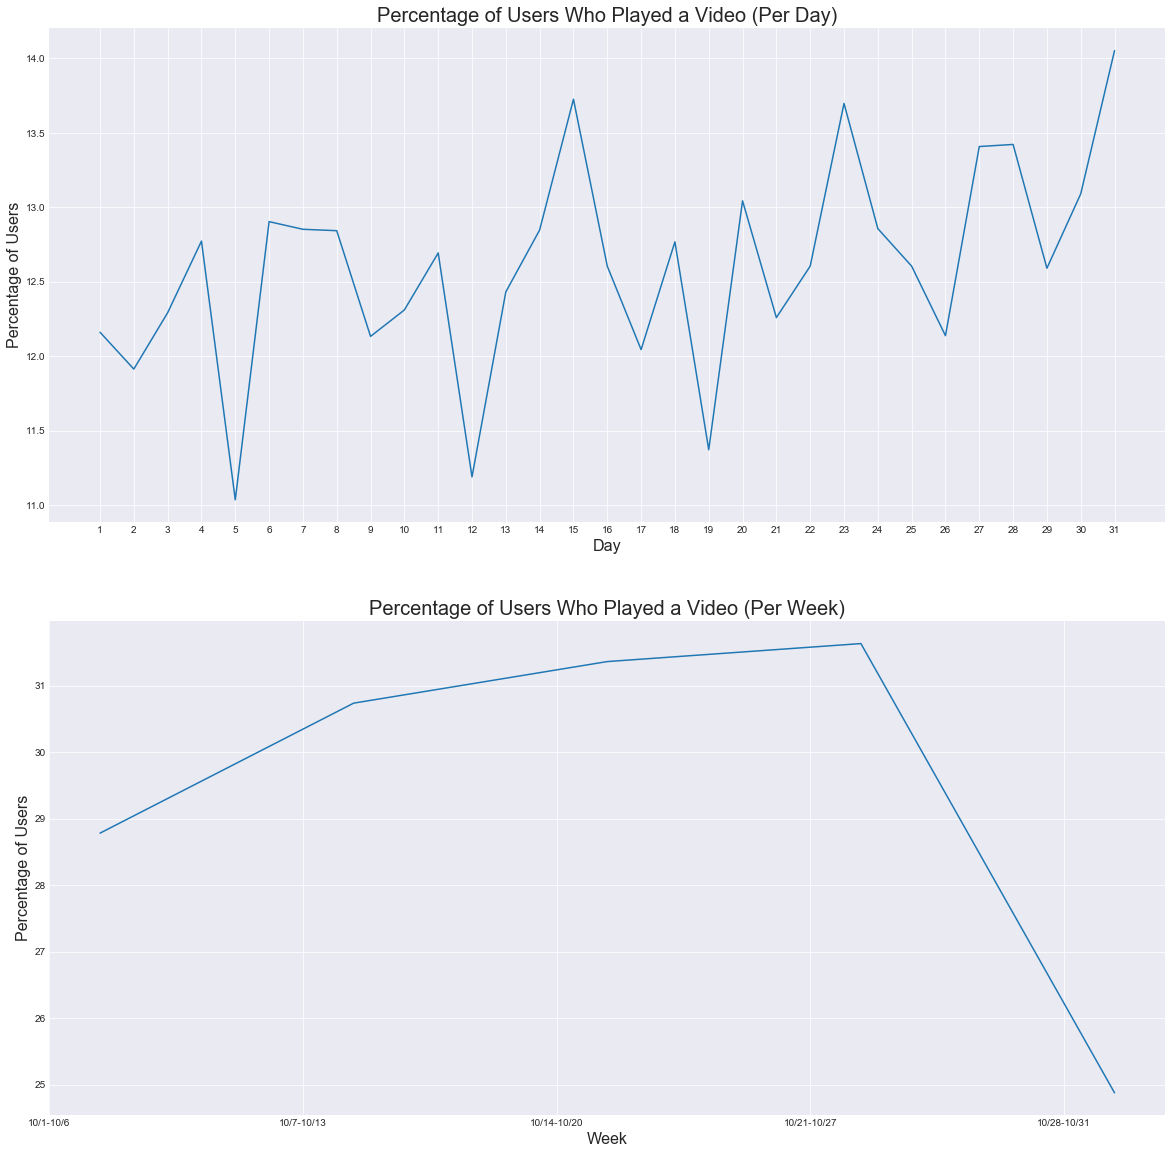

In [80]:
plot_daily_and_weekly(pct_user_plays_per_day,
                     pct_user_plays_per_week,
                     'Percentage of Users',
                     'Percentage of Users Who Played a Video')

The percentage of users who watched a video ranges from 11-14% daily and. 25-33% weekly (but again, the 25% week is missing three days, so this percentage is probably not accurate).

# Identify what percentage of sessions involve a video play lasting longer than 10 seconds.

In [81]:
total_sessions = len(sessions)
longer_than_ten_videos = video_plays[video_plays.viewed_seconds > 10]

In [82]:
unique_sessions = longer_than_ten_videos.nunique()['session_id']

In [83]:
print(f'Overall, the percentage of sessions that involve a video play lasting longer than 10 seconds is {round((unique_sessions/total_sessions)*100,2)}%')

Overall, the percentage of sessions that involve a video play lasting longer than 10 seconds is 51.72%


#### Daily Percentage

In [84]:
pct_longer_than_ten_per_day = (longer_than_ten_videos.groupby('day').nunique()['session_id']/sessions.groupby('day').nunique()['session_id'])*100


In [85]:
pct_longer_than_ten_per_day

day
1     51.707489
2     54.110852
3     54.107615
4     55.488703
5     49.718876
6     49.001188
7     54.282642
8     54.132279
9     54.172840
10    53.023590
11    55.394089
12    49.606705
13    48.687562
14    54.939024
15    57.273874
16    55.205546
17    55.022489
18    56.395914
19    50.622682
20    50.587577
21    54.344252
22    55.657895
23    55.962996
24    55.022453
25    54.652687
26    51.559655
27    49.458446
28    56.272867
29    54.360190
30    54.530782
31    56.001800
Name: session_id, dtype: float64

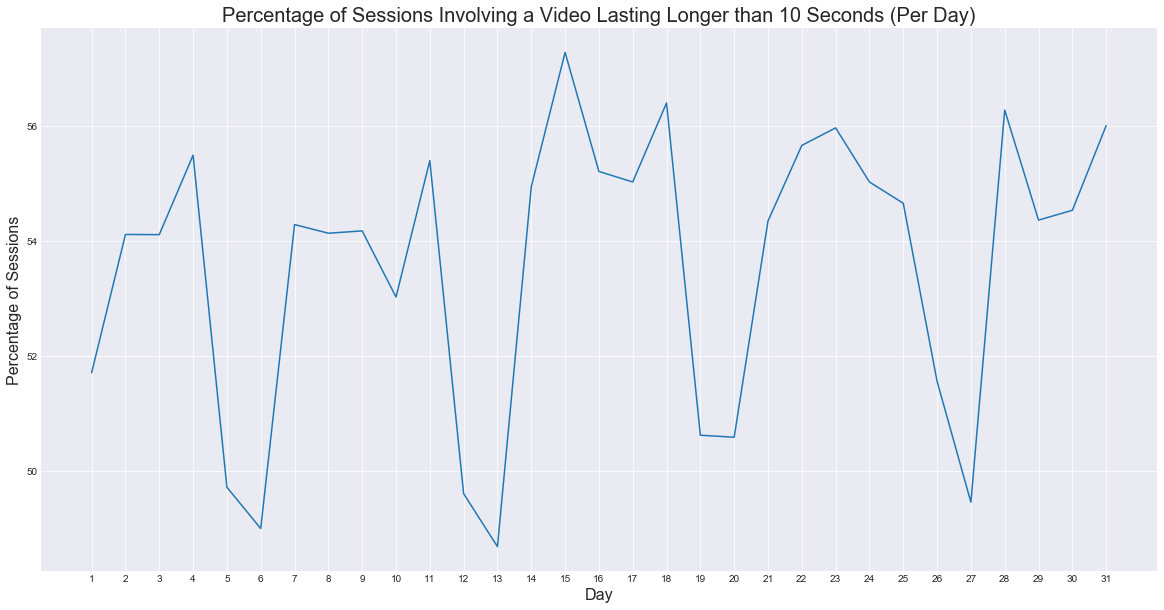

In [86]:
_, ax = plt.subplots(figsize=(20,10))
ax.plot(pct_longer_than_ten_per_day)
ax.set_xlabel('Day',fontsize=16)
ax.set_ylabel('Percentage of Sessions',fontsize=16)
ax.set_title('Percentage of Sessions Involving a Video Lasting Longer than 10 Seconds (Per Day)',fontsize=20)
ax.set_xticks(np.arange(1,32))
ax.set_xticklabels(np.sort(sessions.day.unique()))
plt.show()

The daily percentage of sessions involving a video lasting longer than 10 seconds ranges from 48.69% to 57.27%, with the max occurring on 10/15.

#### Key takeaways:
- Out of 21,429 users, 15 have never logged into the app.
- The first time users used the app ranges from 2016 to 2019, with the bulk of users logging in in 2019.
- The length of a session ranges from a few seconds to over 28 days, with the median around 18 minutes (the average is around 1:31 due to the outliers).
- IPhone 7s are used the most when the app is used in sessions lasting over 12 hours.
- Newer IPhones (XR, 8 Plus, X, XS Max, 8) are used the most for all sessions.
- Most users have 1 or 2 devices that they use for the Stream App, but some users have up to 12!!
- Most users only used the app a handful of times in Oct 2019, but 25% of users used the app 17-440 times.
- The viewing option are Live, DVR, Rental, Purchase and On-Demand.
- Overall, most users barely watched any of the videos they played. Broken down, on average, On-Demand had the highest % watched, then DVR, then Purchase, then Rental, then Live.
- The app is mostly used to watch Live TV, then On-Demand, DVR, Purchase and Rental (in that order).
- Most video plays occur between 0-4 AM UTC, which makes me think all of these users are from the East Coast since this time corresponds to primetime on the East Coast.
- Most sessions only involve <4 videos, but the max is 14,422. There are quite a few outliers with > 2000 video plays per session, which I would definitely want to look into more.
- The top 5 providers in Oct 2019 were HBO, NBC, STARZ, ABC and TLC.
- The top 5 stations were MSNBC, CNNHD, ESPND, FNCHD, and FS1HD.
- The top 5 programs were MLB Playoffs, Family Guy, Monday Night Football, 2019 World Series, and Outdaughtered.
- Video plays were fairly consistent throughout the month, but there was a spike on Oct 23/24.
- The peak number of unique users to start a session and the peak number sessions was on 10/27.
- The peak number of unique users to start a video was on 10/31 with a little over 14% of users starting a video, while the peak number of videos started was 10/24.
- Overall, the percentage of sessions that involve a video play lasting longer than 10 seconds is 51.72%.
- The daily percentage of sessions involving a video lasting longer than 10 seconds ranges from 48.69% to 57.27%, with the max occurring on 10/15.

#### Further investigations I would want to do (not an enhaustive list - every time I come back to this assignment, I think of new questions)
- Is there a correlation between the long sessions and when the user first used the app? Since old models of the iPhone are the most common device used for the longest sessions, I would be curious if these are also the older users.
- I'd like to join the three datasets and perform clustering on them to see if we could group the users into meaningful groups. I would need to add some more columns to the sessions and video plays datasets to handle the columns that aren't numeric already (probably creating dummies for device model, station, program title, provider and watch type).
- What is up with the upper end of the number of video plays per second? I'd want to investigate the sessions with more than 2000 video plays.
- What is up with the other sessions that had over 200 pages viewed? I looked at the top 2, but I would want to look at more.
- For the sessions that lasted over 12 hours, how many had NO video plays during that session and what could those sessions be?
- Look into the users who had more than 400 sessions on the app.
- Look into the sessions where the user's viewed seconds exceeded the program length.